In [1]:
cd /orange/adamginsburg/salt/maud/

/orange/adamginsburg/salt/maud


In [2]:
ls spectra

figures/
G17_SPW0_2017.image_meanspec.fits
G17_SPW0_2017.image_stack.fits
G17_SPW1_2017.image_meanspec.fits
G17_SPW1_2017.image_stack.fits
G17_SPW2_2017.image_meanspec.fits
G17_SPW2_2017.image_stack.fits
G17_SPW3_2017.image_meanspec.fits
G17_SPW3_2017.image_stack.fits
member.uid___A001_X1528_X2a2.AFGL_2136_IRS_1_sci.spw19.cube.I.pbcor_meanspec.fits
member.uid___A001_X1528_X2a2.AFGL_2136_IRS_1_sci.spw19.cube.I.pbcor_stack.fits
member.uid___A001_X1528_X2a2.AFGL_2136_IRS_1_sci.spw25.cube.I.pbcor_meanspec.fits
member.uid___A001_X1528_X2a2.AFGL_2136_IRS_1_sci.spw25.cube.I.pbcor_stack.fits
NaCl_v_le_3_stackcube_meanspec.fits


In [3]:
import socket
socket.gethostname()

'c0713a-s29.ufhpc'

In [4]:
import sys
sys.path.append('/orange/adamginsburg/salt/Orion_ALMA_2016.1.00165.S/analysis/')

In [5]:
%matplotlib inline
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'
from spectral_cube import SpectralCube
from astropy import units as u
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x2b176f7d2280>

In [6]:
doplot=True

import warnings
with warnings.catch_warnings():
    warnings.simplefilter('error')
    %run -i /orange/adamginsburg/salt/code/line_fitting_G17.py

In [7]:
import warnings
warnings.simplefilter('ignore')

In [8]:
ls spectra/*AFGL_2136*stack.fits

spectra/member.uid___A001_X1528_X2a2.AFGL_2136_IRS_1_sci.spw19.cube.I.pbcor_stack.fits
spectra/member.uid___A001_X1528_X2a2.AFGL_2136_IRS_1_sci.spw25.cube.I.pbcor_stack.fits


In [9]:
%run -i /orange/adamginsburg/salt/code/line_fitting_G17.py

spw 0: rms=0.00020649570972150282
Line 39K-35Clv=4-4 J=29-28 with frequency 217.22891175712175 GHz has SNR=5.5
Line 39K-35Clv=3-3 J=29-28 with frequency 218.57970759934983 GHz has SNR=11.2
Line 39K-37Clv=4-4 J=30-29 with frequency 218.3965682524781 GHz has SNR=2.5
Line 41K-35Clv=0-0 J=29-28 with frequency 217.54316883063962 GHz has SNR=2.5
Line 23Na-35Clv=2-2 J=17-16 with frequency 217.980231 GHz has SNR=19.6
Line 41K-37Clv=1-1 J=30-29 with frequency 217.17723397093303 GHz has SNR=1.6
Line 41K-37Clv=0-0 J=30-29 with frequency 218.48413771123413 GHz has SNR=3.8
spw 1: rms=0.00020844134767156173
Line 39K-35Clv=2-2 J=29-28 with frequency 219.93611261476423 GHz has SNR=24.3
Line 39K-37Clv=3-3 J=30-29 with frequency 219.7347580948684 GHz has SNR=7.0
Line 41K-35Clv=4-4 J=30-29 with frequency 219.59177027727014 GHz has SNR=2.3
Line 23Na-35Clv=1-1 J=17-16 with frequency 219.614936 GHz has SNR=13.4
Line 41K-37Clv=4-4 J=31-30 with frequency 220.37552136846418 GHz has SNR=3.0
spw 2: rms=0.0002235

Line 41K-35Clv=0-0 J=31-30 with frequency 232.49980161177257 GHz has SNR=11.2
Line 23Na-35Clv=1-1 J=18-17 with frequency 232.50997700000002 GHz has SNR=17.3
Line 41K-37Clv=1-1 J=32-31 with frequency 231.60913136874447 GHz has SNR=1.5
spw 3: rms=0.0001664776873584926
Line 39K-35Clv=3-3 J=31-30 with frequency 233.60569798423805 GHz has SNR=6.3
3 234.33493147880353 GHz: result=upper_state lower_state    Aij    Frequency_cm        Freq               E_U                E_L              QNs       vu  vl  Ju  Jl  gu   gl         Species       
                          1 / s      1 / cm           GHz                 K                  K                                                                       
----------- ----------- --------- ------------ ------------------ ------------------ ------------------ ------------- --- --- --- --- ---- ---- ---------------------
       1538        1537 0.0081735     7.816059 234.33493147880353 1356.5702932951817 1345.3247246098006 v=3-3 J=32-31   3   3

In [14]:
import kcl_rotation_diagram
import imp
imp.reload(kcl_rotation_diagram)
from kcl_rotation_diagram import nupper_of_kkms, fit_tex
import dust_emissivity
from pyspeckit.spectrum.models.lte_molecule import get_molecular_parameters


In [15]:
tbl = table.Table.read(paths.tpath('G17_fitted_stacked_lines.txt'), format='ascii.fixed_width')

In [16]:
from astroquery.linelists.cdms import CDMS

In [17]:
frqs, einsteinAij, degeneracies, EU, partfunc = get_molecular_parameters('K-41-Cl, v=0-15', catalog='CDMS', fmin=85*u.GHz, fmax=360*u.GHz)

KCl: 5 in-band, 5 detected
KCl
Tex=37.00493307435343 K, Ntot=7.922349362330157e+30 1 / cm2, log(Ntot)=30.8988539901494, Q_rot=201.00789711345132, nuplim=2
Tex=60.3158169662432 K, Ntot=2.833664489224828e+27 1 / cm2, log(Ntot)=27.452348427737792, Q_rot=327.4356454679352, nuplim=2
Tex=916.190989691518 K, Ntot=2.016987071836987e+16 1 / cm2, log(Ntot)=16.304703114549973, Q_rot=1627.0466311748905, nuplim=2


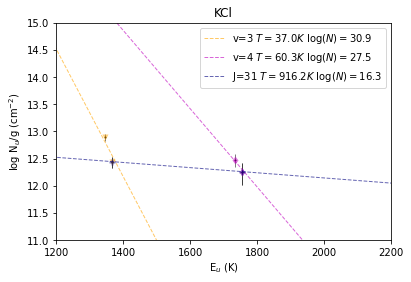

In [34]:
frqs, einsteinAij, degeneracies, EU, partfunc = get_molecular_parameters('KCl', fmin=85*u.GHz, fmax=360*u.GHz)

kcl35mask = np.array([(not hasattr(row['Species'], 'mask')) and
                     ('KCl' == row['Species'][:3] or
                      '39K-35Cl' in row['Species']) for row in tbl])

bad = ((tbl['Line Name'] == 'KClv=4_13-12') |
       (tbl['Line Name'] == 'KClv=6_31-30') |
       (tbl['Line Name'] == 'KClv=8_27-26'))

print("KCl: {0} in-band, {1} detected".format(kcl35mask.sum(),
                                              (kcl35mask & (~bad)).sum()))

kcl35tbl = tbl[kcl35mask]
kcl35freqs = u.Quantity(kcl35tbl['Frequency'], u.GHz)
kkms_kcl35 = (2*np.pi*kcl35tbl['Fitted Width']**2)**0.5 * kcl35tbl['Fitted Amplitude K']
ekkms_kcl35 = (2*np.pi)**0.5 * (kcl35tbl['Fitted Width error']**2 *
                                kcl35tbl['Fitted Amplitude K']**2 +
                                kcl35tbl['Fitted Width']**2 *
                                kcl35tbl['Fitted Amplitude error K']**2)**0.5
#kkms_kcl35 = (2*np.pi*(4)**2)**0.5 * kcl35tbl['Fitted Amplitude K']
#Aul = u.Quantity(list(map(get_Aul_(frqs), kcl35freqs)), u.Hz)
#deg = u.Quantity(list(map(get_deg_(frqs), kcl35freqs)))
#kcl35tbl.add_column(table.Column(name='Aul', data=Aul))
#kcl35tbl.add_column(table.Column(name='Degeneracy', data=deg))
Aul = kcl35tbl['Aij']
deg = kcl35tbl['deg']
kcl35_nug = nupper_of_kkms(kkms=kkms_kcl35,
                           freq=kcl35freqs,
                           Aul=Aul,
                           #degeneracies=deg,
                           )
kcl35_nu = kcl35_nug / deg
ekcl35_nug = nupper_of_kkms(kkms=ekkms_kcl35,
                            freq=kcl35freqs,
                            Aul=Aul,
                            #degeneracies=deg
                           )
ekcl35_nu = ekcl35_nug / deg

kcl35tbl.add_column(table.Column(name='N_U', data=kcl35_nu,
                                 ))

v0 = np.array(['v=0' in row['Species'] for row in kcl35tbl])
v1 = np.array(['v=1' in row['Species'] for row in kcl35tbl])
v2 = np.array(['v=2' in row['Species'] for row in kcl35tbl])
v3 = np.array(['v=3' in row['Species'] for row in kcl35tbl])
v4 = np.array(['v=4' in row['Species'] for row in kcl35tbl])
v5 = np.array(['v=5' in row['Species'] for row in kcl35tbl])
v6 = np.array(['v=6' in row['Species'] for row in kcl35tbl])
v7 = np.array(['v=7' in row['Species'] for row in kcl35tbl])
v8 = np.array(['v=8' in row['Species'] for row in kcl35tbl])
j13 = np.array(['J=13' in row['Species'] for row in kcl35tbl])
j29 = np.array(['J=29' in row['Species'] for row in kcl35tbl])
j31 = np.array(['J=31' in row['Species'] for row in kcl35tbl])

pl.figure(1).clf()
print("KCl")

optdepth = (dust_emissivity.dust.kappa(kcl35freqs, beta=2) * 120*u.g/u.cm**2).decompose().value
kcl35_nug_dustcorr = nupper_of_kkms(kkms=kkms_kcl35 * np.exp(optdepth),
                                    freq=kcl35freqs,
                                    Aul=Aul,
                                    #degeneracies=deg,
                                    )
kcl35_nu_dustcorr = kcl35_nug_dustcorr / deg


#tex0 = fit_tex(u.Quantity(kcl35tbl['EU_K'][v0], u.K), kcl35_nu[v0],
#               errors=ekcl35_nu[v0], plot=True, verbose=True,
#               partition_func=partfunc, marker='o', color='r', label='v=0 ')
#tex0_dustc = fit_tex(u.Quantity(kcl35tbl['EU_K'][v0], u.K), kcl35_nu_dustcorr[v0],
#                     errors=ekcl35_nu[v0], plot=True, verbose=True,
#                     molecule=kcl35, marker='o', color='b', label='v=0 ')
#tex0_dustc_nob3 = fit_tex(u.Quantity(kcl35tbl['EU_K'][v0][1:], u.K), kcl35_nu_dustcorr[v0][1:],
#                          errors=ekcl35_nu[v0][1:], plot=True, verbose=True,
#                     molecule=kcl35, marker='o', color='g', label='v=0 no b3')
#tex1 = fit_tex(u.Quantity(kcl35tbl['EU_K'][v1], u.K), kcl35_nu[v1],
#               errors=ekcl35_nu[v1], plot=True, verbose=True,
#               molecule=kcl35, marker='s', color='b', label='v=1 ')
#tex2 = fit_tex(u.Quantity(kcl35tbl['EU_K'][v2], u.K), kcl35_nu[v2],
#               errors=ekcl35_nu[v2], plot=True, verbose=True,
#               molecule=kcl35, marker='^', color='g', label='v=2 ')
tex3 = fit_tex(u.Quantity(kcl35tbl['EU_K'][v3], u.K), kcl35_nu[v3],
               errors=ekcl35_nu[v3], plot=True, verbose=True,
               partition_func=partfunc, marker='v', color='orange', label='v=3 ')
tex4 = fit_tex(u.Quantity(kcl35tbl['EU_K'][v4], u.K), kcl35_nu[v4],
               errors=ekcl35_nu[v4], plot=True, verbose=True,
               partition_func=partfunc, marker='d', color='m', label='v=4 ')
#texJ13 = fit_tex(u.Quantity(kcl35tbl['EU_K'][j13], u.K), kcl35_nu[j13],
#                 errors=ekcl35_nu[j13], plot=True, verbose=True,
#                 partition_func=partfunc, marker='h', color='k', label='J=13 ')
##texJ13_dustc = fit_tex(u.Quantity(kcl35tbl['EU_K'][j13], u.K), kcl35_nu_dustcorr[j13],
##                 errors=ekcl35_nu[j13], plot=True, verbose=True,
##                 molecule=kcl35, marker='h', color='k', label='J=13 dust')
#texJ29 = fit_tex(u.Quantity(kcl35tbl['EU_K'][j29], u.K), kcl35_nu[j29],
#                 errors=ekcl35_nu[j29], plot=True, verbose=True,
#                 partition_func=partfunc, marker='o', color='b', label='J=29 ')
texJ31 = fit_tex(u.Quantity(kcl35tbl['EU_K'][j31], u.K), kcl35_nu[j31],
                 errors=ekcl35_nu[j31], plot=True, verbose=True,
                 partition_func=partfunc, marker='P', color='navy', label='J=31 ')

pl.legend(loc='best')
pl.title("KCl")
pl.axis((1200, 2200, 11, 15))
pl.savefig(paths.fpath("G17_KCl_rotational_diagrams.pdf"))
pl.show()

In [35]:
paths.fpath('')

'/orange/adamginsburg/salt/figures/'

NaCl: 5 in-band, 5 detected
NaCl
Tex=33.99931775808523 K, Ntot=2.550931892331824e+23 1 / cm2, log(Ntot)=23.406698863478734, Q_rot=109.13283033195415, nuplim=3


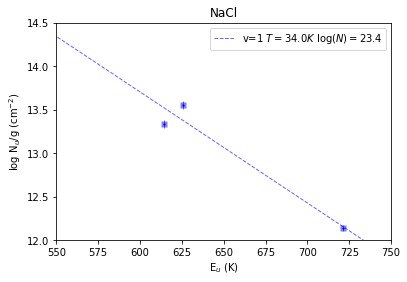

In [32]:
    frqs, einsteinAij, degeneracies, EU, partfunc = get_molecular_parameters('NaCl, v=0-15', catalog='CDMS', fmin=85*u.GHz, fmax=360*u.GHz)

    tbl = table.Table.read(paths.tpath('G17_fitted_stacked_lines.txt'), format='ascii.fixed_width')

    naclmask = np.array([(not hasattr(row['Species'], 'mask')) and
                         ('NaCl' == row['Species'][:4] or
                         '23Na-35Cl' in row['Species'])
                         for row in tbl])

    # mask out a bad fit
    # on edge of absorption feature
    bad = (tbl['Line Name'] == 'NaClv=4_17-16')

    print("NaCl: {0} in-band, {1} detected".format(naclmask.sum(),
                                                   (naclmask & (~bad)).sum()))

    nacltbl = tbl[naclmask & (~bad)]
    naclfreqs = u.Quantity(nacltbl['Frequency'], u.GHz)
    kkms_nacl = (2*np.pi*nacltbl['Fitted Width']**2)**0.5 * nacltbl['Fitted Amplitude K']
    ekkms_nacl = (2*np.pi)**0.5 * (nacltbl['Fitted Width error']**2 *
                                   nacltbl['Fitted Amplitude K']**2 +
                                   nacltbl['Fitted Width']**2 *
                                   nacltbl['Fitted Amplitude error K']**2)**0.5
    #Aul = u.Quantity(list(map(get_Aul_(frqs), naclfreqs)), u.Hz)
    #deg = u.Quantity(list(map(get_deg_(frqs), naclfreqs)))
    Aul = nacltbl['Aij']
    deg = nacltbl['deg']
    nacl_nu = nupper_of_kkms(kkms=kkms_nacl,
                             freq=naclfreqs,
                             Aul=Aul,)/deg
    enacl_nu = nupper_of_kkms(kkms=ekkms_nacl,
                              freq=naclfreqs,
                              Aul=Aul)/deg


    v0 = np.array(['v=0' in row['Species'] for row in nacltbl])
    v1 = np.array(['v=1' in row['Species'] for row in nacltbl])
    v2 = np.array(['v=2' in row['Species'] for row in nacltbl])
    v3 = np.array(['v=3' in row['Species'] for row in nacltbl])
    v4 = np.array(['v=4' in row['Species'] for row in nacltbl])
    v5 = np.array(['v=5' in row['Species'] for row in nacltbl])
    v6 = np.array(['v=6' in row['Species'] for row in nacltbl])
    v7 = np.array(['v=7' in row['Species'] for row in nacltbl])
    v8 = np.array(['v=8' in row['Species'] for row in nacltbl])
    j17 = np.array(['J=17' in row['Species'] for row in nacltbl])
    j18 = np.array(['J=18' in row['Species'] for row in nacltbl])

    pl.figure(3).clf()
    print("NaCl")
    #tex0 = fit_tex(u.Quantity(nacltbl['EU_K'][v0], u.K), nacl_nu[v0], plot=True,
    #               verbose=True, partition_func=partfunc, marker='o', color='r')
    tex1 = fit_tex(u.Quantity(nacltbl['EU_K'][v1], u.K), nacl_nu[v1],
                   errors=enacl_nu[v1], plot=True,
                   verbose=True, partition_func=partfunc, marker='s', color='b', label='v=1 ')
    #tex2 = fit_tex(u.Quantity(nacltbl['EU_K'][v2], u.K), nacl_nu[v2],
    #               errors=enacl_nu[v2], plot=True,
    #               verbose=True, partition_func=partfunc, marker='^', color='g', label='v=2 ')
    #tex3 = fit_tex(u.Quantity(nacltbl['EU_K'][v3], u.K), nacl_nu[v3],
    #               errors=enacl_nu[v3], plot=True,
    #               verbose=True, partition_func=partfunc, marker='o', color='r', label='v=3 ')
    #tex4 = fit_tex(u.Quantity(nacltbl['EU_K'][v4], u.K), nacl_nu[v4],
    #               errors=enacl_nu[v4], plot=True,
    #               verbose=True, partition_func=partfunc, marker='d', color='orange', label='v=4 ')
    #tex5 = fit_tex(u.Quantity(nacltbl['EU_K'][v5], u.K), nacl_nu[v5],
    #               errors=enacl_nu[v5], plot=True,
    #               verbose=True, partition_func=partfunc, marker='v', color='m', label='v=5 ')
    #tex6 = fit_tex(u.Quantity(nacltbl['EU_K'][v6], u.K), nacl_nu[v6],
    #               errors=enacl_nu[v6], plot=True,
    #               verbose=True, partition_func=partfunc, marker='v', color='m', label='v=6 ')
    #texJ18 = fit_tex(u.Quantity(nacltbl['EU_K'][j18], u.K), nacl_nu[j18],
    #                errors=enacl_nu[j18], plot=True, verbose=True,
    #                partition_func=partfunc, marker='h', color='k', label='J=18 ')
    #texJ17 = fit_tex(u.Quantity(nacltbl['EU_K'][j17], u.K), nacl_nu[j17],
    #                errors=enacl_nu[j17], plot=True, verbose=True,
    #                partition_func=partfunc, marker='>', color='c', label='J=17 ')
    pl.legend(loc='upper right')
    pl.axis([550,750,12.,14.5])
    pl.title("NaCl")
    pl.savefig(paths.fpath("G17_NaCl_rotational_diagrams.pdf"))



In [20]:
v0,v1,v2,v3,v4,v5

(array([ True, False, False, False, False]),
 array([False,  True,  True,  True, False]),
 array([False, False, False, False,  True]),
 array([False, False, False, False, False]),
 array([False, False, False, False, False]),
 array([False, False, False, False, False]))

In [29]:
nacltbl

Line Name,Species,QNs,v,J$_u$,J$_l$,Frequency,Fitted Velocity,Fitted Velocity error,Fitted Width,Fitted Width error,Fitted Amplitude K,Fitted Amplitude error K,Integrated Intensity,Integrated Intensity error,Jy/K,EU_K,deg,Aij,Flag
str22,str22,str13,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,str5
23Na-35Clv=0-0 J=18-17,23Na-35Clv=0-0 J=18-17,v=0-0 J=18-17,0,18,17,234.251912,-300852.37010469293,372.3308660546672,7146.555936124988,377.89368531473525,46.754439983147215,2.1118898383877456,837547.7782538895,23236.960368867905,29023.19783120873,106.9,592,0.005900000222027302,True
23Na-35Clv=1-1 J=17-16,23Na-35Clv=1-1 J=17-16,v=1-1 J=17-16,1,17,16,219.614936,-299904.8651427915,483.91502805648014,5597.471494765791,483.95933874396746,45.66360657041842,3.4189175176797053,640696.0321902223,29233.821712080062,31268.729045585962,614.5,560,0.004900000058114529,True
23Na-35Clv=1-1 J=18-17,23Na-35Clv=1-1 J=18-17,v=1-1 J=18-17,1,18,17,232.50997700000002,-299566.4630997842,824.5838430272279,12076.400418172454,1020.9343159698004,38.97120546066512,2.251437519105209,1179699.1821681347,48189.880102308234,28051.61843519821,625.7,592,0.005799999926239252,True
23Na-35Clv=1-1 J=25-24,23Na-35Clv=1-1 J=25-24,v=1-1 J=25-24,1,25,24,322.64999800000004,-300443.1377707277,395.815093294069,6734.712071727014,425.0530994102737,5.300939805375923,0.2696227787937445,89487.38966158289,2893.798404533859,890.9197408767873,721.1,816,0.01600000075995922,True
23Na-35Clv=2-2 J=17-16,23Na-35Clv=2-2 J=17-16,v=2-2 J=17-16,2,17,16,217.980231,-299248.91049247514,463.0149991441825,7885.58271654781,467.34940612394973,39.79108292357208,2.0258519037054152,786519.48211432,24515.814800560165,31075.307300628723,1128.4,560,0.004900000058114529,True
